# 抄襲自:https://www.kaggle.com/vincee/intel-image-classification-cnn-keras

In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [13]:
"""
他原本格式94這樣寫,且他後面有告訴我們從判斷錯誤的圖片中更改模型,所以我換成名稱之後應該比較好判斷
"""

class_names = ['long_skirt', 'Muslim', 'tshirt', 'long_tshirt', 'jeans', 'ring','earring','hat','wallet','trunk','phone_case',
               'iphone','clock','feeding_bottle','electric_pot','coffee_beans','flat_shoes','high_heels','Electrical_appliances',
               'usb','chair','racket','helmet','gloves','watch','belt','earphone','toycar','thick_coat',
               'tide_pants','canvas_shoes','snacks','mask','bottled_liquid','care_products','perfume','cleaning_tools',
               'laptop','bowl','decoration','bathroom_supplies','sofa']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (100, 100)

In [13]:
"""
改名
把他的標籤0~41換成上面打的分類
"""


import os
path='D:\\Data\\shopeedata\\train\\train3\\' 
files=os.listdir(path)
print(files) #印出讀取到的檔名稱，用來確認自己是不是真的有讀到

n=0 #設定初始值
for i in files: #因為資料夾裡面的檔案都要重新更換名稱
    oldname=path+files[n] 
    newname=path+class_names[n]
    os.rename(oldname,newname)
    print(oldname+'>>>'+newname) #印出原名與更名後的新名，可以進一步的確認每個檔案的新舊對應
    n=n+1 #當有不止一個檔案的時候，依次對每一個檔案進行上面的流程，直到更換完畢就會結束

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41']
D:\Data\shopeedata\train\train3\00>>>D:\Data\shopeedata\train\train3\long_skirt
D:\Data\shopeedata\train\train3\01>>>D:\Data\shopeedata\train\train3\Muslim
D:\Data\shopeedata\train\train3\02>>>D:\Data\shopeedata\train\train3\tshirt
D:\Data\shopeedata\train\train3\03>>>D:\Data\shopeedata\train\train3\long_tshirt
D:\Data\shopeedata\train\train3\04>>>D:\Data\shopeedata\train\train3\jeans
D:\Data\shopeedata\train\train3\05>>>D:\Data\shopeedata\train\train3\ring
D:\Data\shopeedata\train\train3\06>>>D:\Data\shopeedata\train\train3\earring
D:\Data\shopeedata\train\train3\07>>>D:\Data\shopeedata\train\train3\hat
D:\Data\shopeedata\train\train3\08>>>D:\Data\shopeedata\train\train3\wallet
D:\Data\shopeedata\train\train3\09>>>D:\Data\shopeedata\tra

In [5]:
"""
讀影像的路經不可以有中文不然會G
"""
IMAGE_SIZE = (100, 100)   #解析度
def load_data():
    dataset = r"D:\Data\shopeedata\train\train3"
    output = []
    images = []
    labels = []
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):                
            # Get the path name of the image
            img_path = os.path.join(os.path.join(dataset, folder), file)

            # Open and resize the img
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, IMAGE_SIZE) 

            # Append the image and its corresponding label to the output
            images.append(image)
            labels.append(label)
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')   
        
    output.append((images, labels))
    return output

(train_images, train_labels) = load_data()[0]

100%|██████████████████████████████████████████████████████████████████████████████| 2705/2705 [00:47<00:00, 57.01it/s]


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)#打散  不然會炸

In [9]:
"""
存成np檔 下次要開比較快
開11G的npy檔只要3分鐘
"""

# np.save(r'D:\Data\train_labels', train_labels)

In [8]:
train_images = np.load(r"D:\Data\train_images.npy")
train_labels = np.load(r"D:\Data\train_labels.npy")

In [1]:
測試 = open(r"D:\Data\train_labels.npy",'r')

In [10]:
#拆分訓練與測試
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(train_images ,train_labels , test_size=0.3, random_state=4)


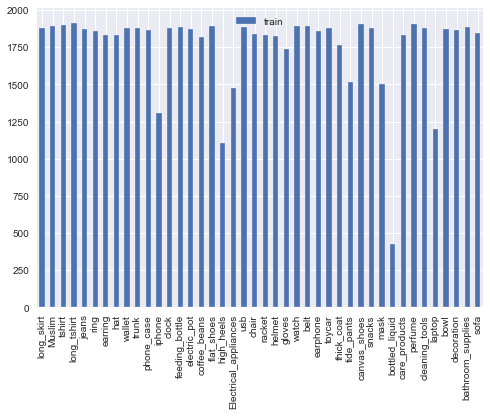

<Figure size 720x720 with 0 Axes>

In [21]:
"""
看一下各類的張數
"""
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)

pd.DataFrame({'train': train_counts,}, 
             index=class_names
            ).plot.bar()
plt.style.use('seaborn')
plt.figure(figsize=(10, 10)) 
plt.show()

In [15]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

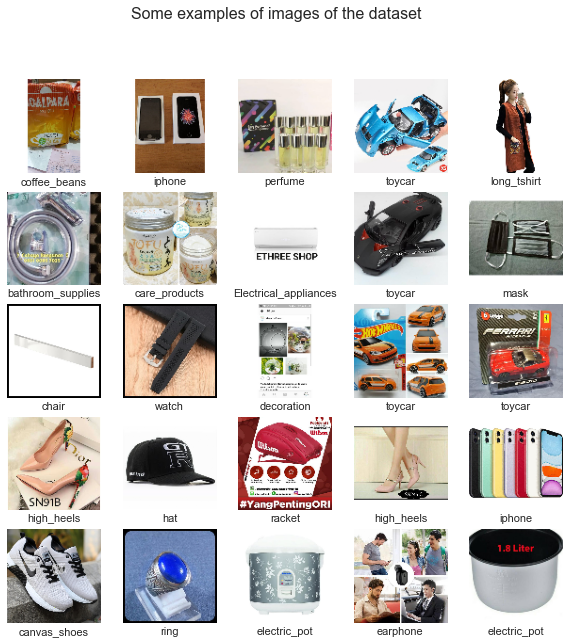

In [19]:
"""
train_images/=255
test_images/=255#浮點要除以255才能變成人類可看的圖片
"""
train_images/=255
display_examples(class_names, train_images, train_labels)

In [11]:
"""
作者原始的寫法
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(42, activation=tf.nn.softmax)
])
model.summary()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2166912   
_________________________________________

In [25]:
"""
序列式寫法
"""
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import *
from keras import layers
import keras
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(42, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16928)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2166912   
_________________________________________________________________
dense_4 (Dense)              (None, 42)               

In [17]:
"""
這是函數式寫法,跟上面模型一樣,之後做模型融合會用到  ps.我覺得模型融合可以無腦提升一點準度(推薦)
"""
from keras.models import Model, Sequential
from keras import optimizers
inputs = Input(shape=(100, 100, 3))
x = layers.Conv2D(32, (3, 3), activation = 'relu')(inputs)
x = layers.MaxPooling2D(5,5)(x)
x = layers.Conv2D(32, (3, 3), activation = 'relu')(x)
x = layers.MaxPooling2D(5,5)(x)
x = layers.Flatten()(x)
x = Dense(128, activation = 'relu')(x)

output = Dense(42, activation='softmax')(x)
model = Model(inputs=inputs, outputs=output)

sgd = optimizers.SGD(lr=0.01, momentum=0.00, decay=0.001, nesterov=False)
RMSprop = keras.optimizers.RMSprop(lr=0.001, rho=0.09, epsilon=0.001, decay=0.001)
Adagrad = keras.optimizers.Adagrad(lr=0.01, epsilon=0.01, decay=0.0)
Adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=0.01, decay=0.0)
#子安推薦lr=0.0001~0.0003, decay
Adam = keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=0.001, decay=0.0, amsgrad=False)
Adamax = keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.01, decay=0.0)
# Nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.01, schedule_decay=0.004)
Nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.99, beta_2=0.9999, epsilon=0.01, schedule_decay=0.0005)

# tbCallBack = TensorBoard(log_dir=r'C:\Users\Big data\Desktop\class\DL\tensorboard\funcardproject',  # log 目录
#                  histogram_freq=0,  # 按照何等频率（epoch）来计算直方图，0为不计算
# #                  batch_size=32,     # 用多大量的数据计算直方图
#                  write_graph=True,  # 是否存储网络结构图
#                  write_grads=True, # 是否可视化梯度直方图
#                  write_images=True,# 是否可视化参数
#                  embeddings_freq=0, 
#                  embeddings_layer_names=None, 
#                  embeddings_metadata=None)
model.summary()

Using TensorFlow backend.


NameError: name 'Input' is not defined

In [64]:
model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_images,train_labels,
                   epochs=20,
                   batch_size=128,
                    validation_split = 0.2)

Train on 59022 samples, validate on 14756 samples
Epoch 1/20
59022/59022 [==============================] - 30s 510us/step - loss: 3.3330 - accuracy: 0.1299 - val_loss: 3.0481 - val_accuracy: 0.1954
Epoch 2/20
59022/59022 [==============================] - 26s 441us/step - loss: 2.9316 - accuracy: 0.2314 - val_loss: 2.8737 - val_accuracy: 0.2420
Epoch 3/20
59022/59022 [==============================] - 25s 418us/step - loss: 2.7730 - accuracy: 0.2704 - val_loss: 2.7586 - val_accuracy: 0.2711
Epoch 4/20
59022/59022 [==============================] - 28s 469us/step - loss: 2.6681 - accuracy: 0.2970 - val_loss: 2.6880 - val_accuracy: 0.2951
Epoch 5/20
59022/59022 [==============================] - 30s 505us/step - loss: 2.5923 - accuracy: 0.3152 - val_loss: 2.6002 - val_accuracy: 0.3140
Epoch 6/20
59022/59022 [==============================] - 37s 624us/step - loss: 2.5267 - accuracy: 0.3315 - val_loss: 2.6020 - val_accuracy: 0.3137
Epoch 7/20
59022/59022 [==============================] 

In [65]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

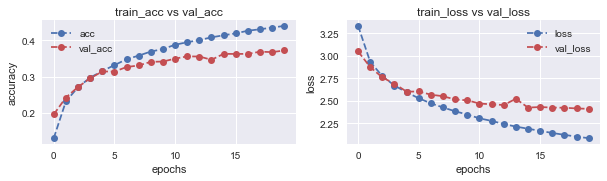

In [127]:
"""
藍線根紅線的距離就是overfit
驗證準確度只有0.15 但幾乎比瞎猜高6.5倍
在這個kaggle比賽裡分為6類,最頂尖的準確度似乎再94%左右
"""
plot_accuracy_loss(history)

In [67]:
#看準確度
test_loss = model.evaluate(test_images, test_labels)

31620/31620 [==============================] - 42s 1ms/step


In [73]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

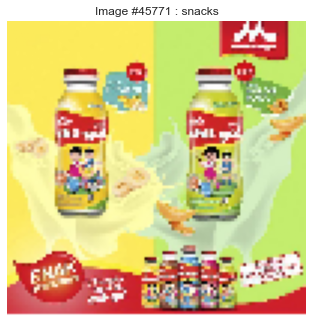

In [74]:
display_random_image(class_names, train_images, train_labels)

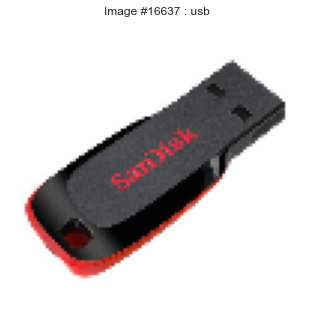

In [84]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [85]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

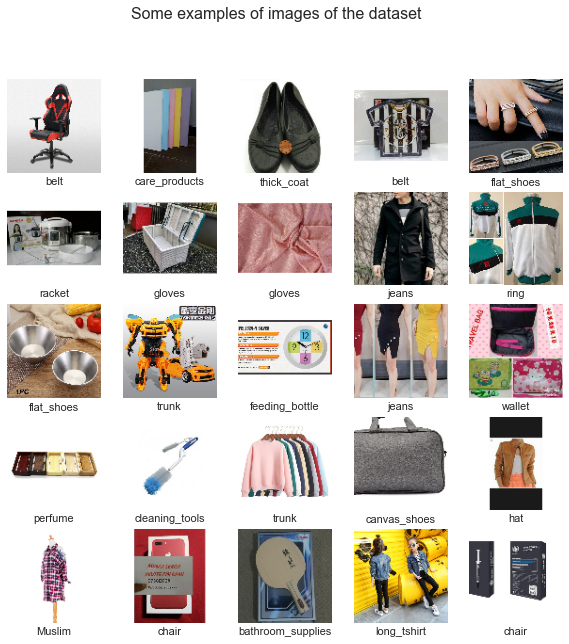

In [86]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

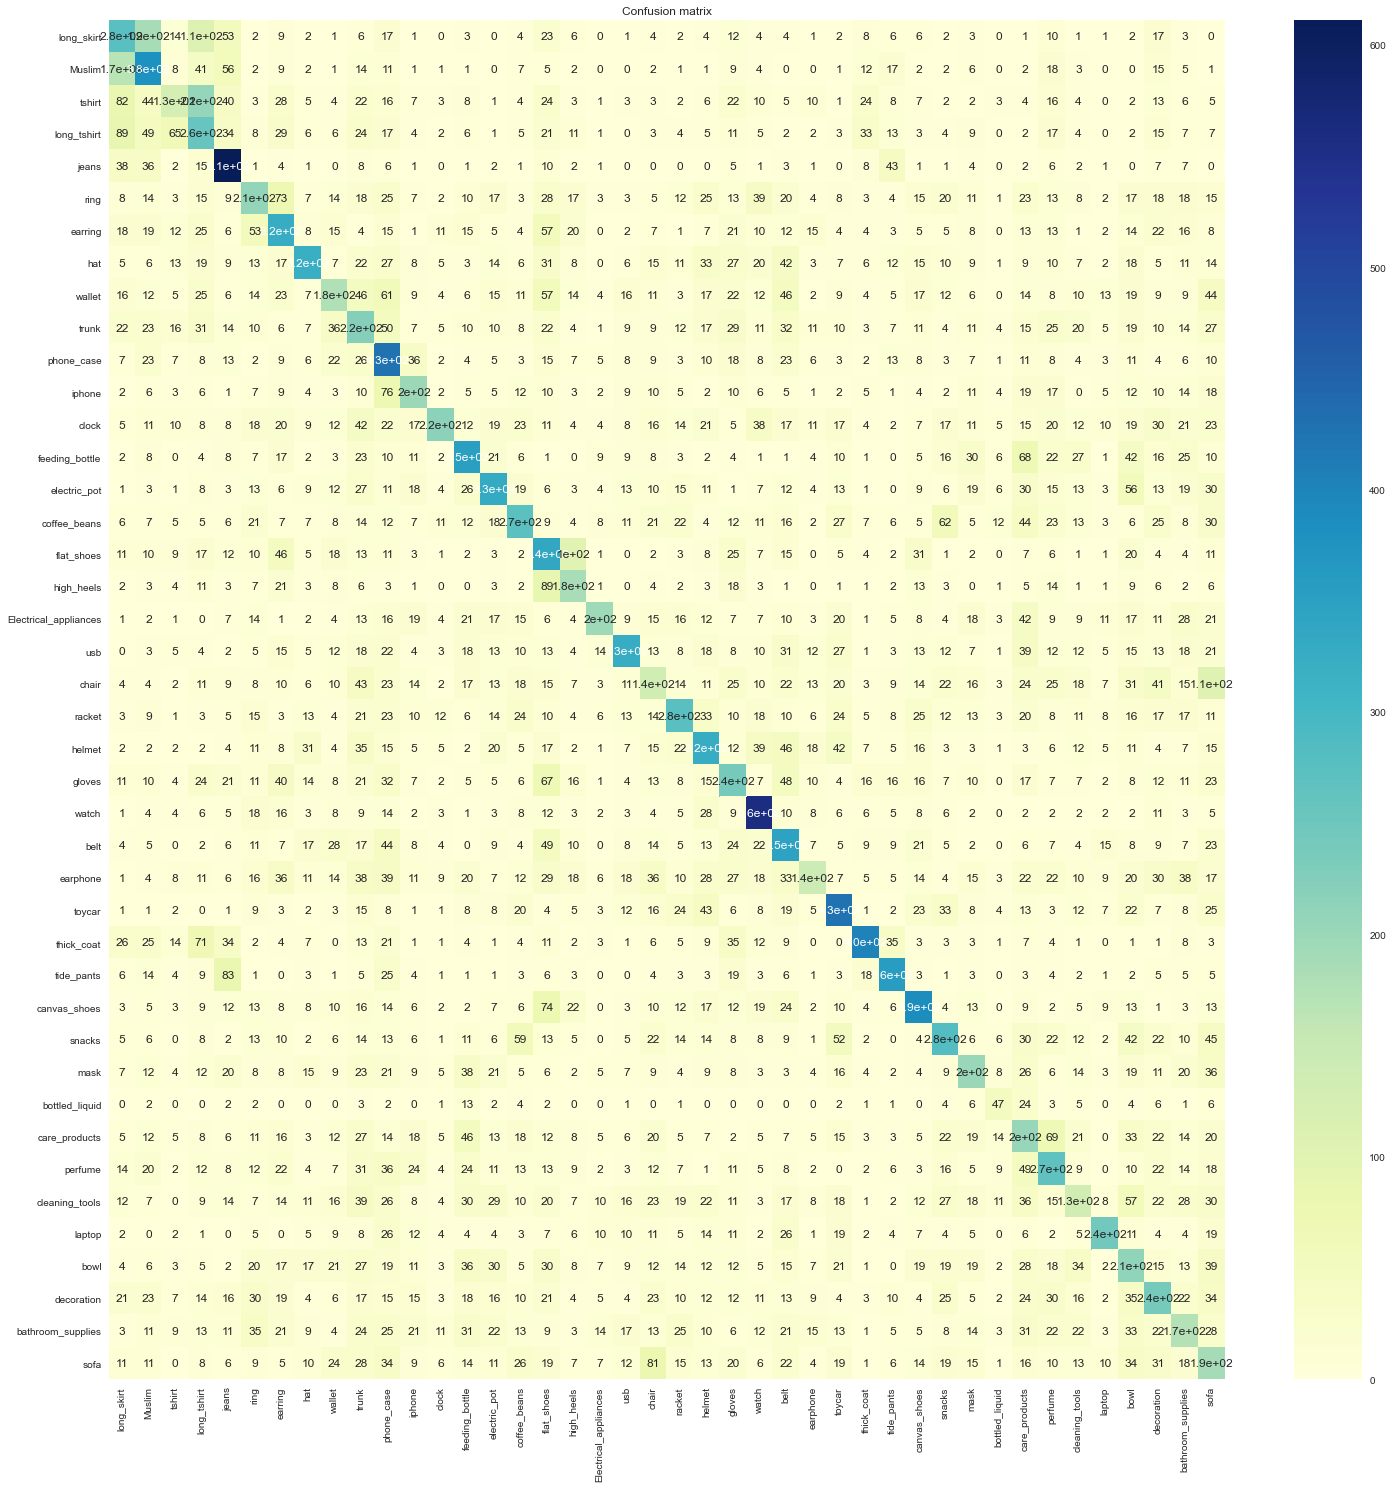

In [110]:
plt.figure(figsize=(25, 25))
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           cmap="YlGnBu",
           annot_kws={"size": 12}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
# plt.savefig("confusion_matrix.png")
plt.show()

In [120]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 27s 0us/step


In [121]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [124]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [125]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

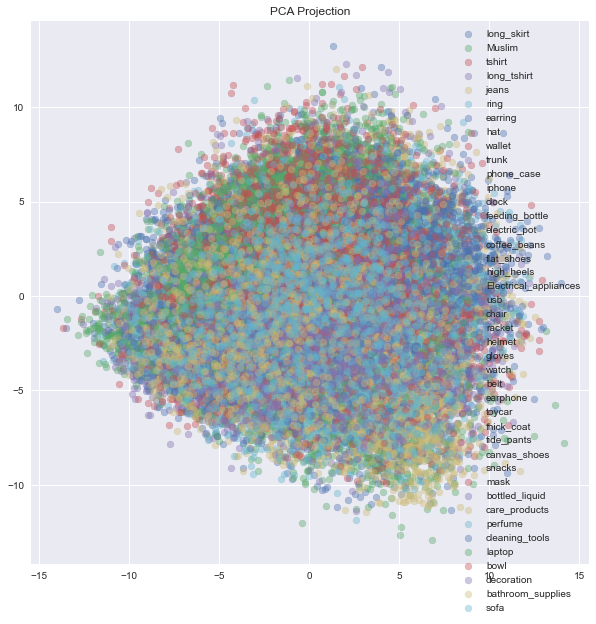

In [126]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()